/apps/jupyter/6.5.4/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
/apps/jupyter/6.5.4/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


The warning in red is explained in the main paper
------------------------------
Wilcoxon Signed-Rank Test (Primary vs Secondary Sludge):
  Test Statistic (W) = 0.0000
  P-value = 0.108809
------------------------------


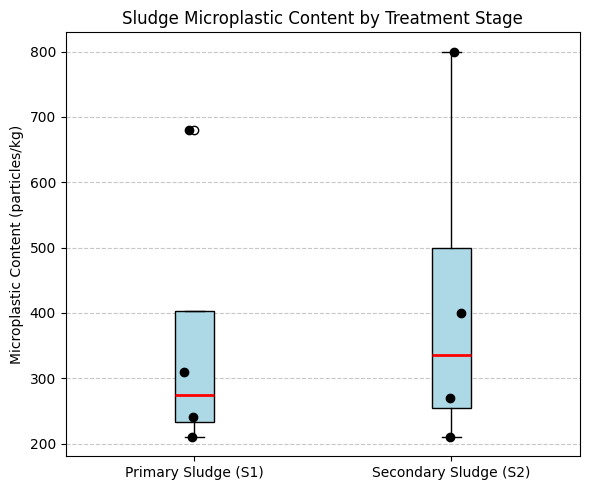

In [7]:
# Microplastics in sludge for 1st and 2nd stage treatment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path


FILE = "Sludge_count.csv"

try:
    p = Path(FILE)
    
    df_raw = pd.read_csv(p)
    
    # Standardize column names for easy access
    df_sludge = df_raw.copy()
    df_sludge.columns = [
        "WWTP_Location", 
        "Primary_Sludge_S1", 
        "Secondary_Sludge_S2"
    ]

    # Convert to numeric, errors='coerce' turns non-numeric values into NaN
    df_sludge["Primary_Sludge_S1"] = pd.to_numeric(df_sludge["Primary_Sludge_S1"], errors='coerce')
    df_sludge["Secondary_Sludge_S2"] = pd.to_numeric(df_sludge["Secondary_Sludge_S2"], errors='coerce')
    
    # Drop any rows with missing numeric data
    df_sludge = df_sludge.dropna().reset_index(drop=True)

except FileNotFoundError:
    print(f"ERROR: Input file '{INPUT_FILE}' not found. Please ensure it is in the same directory.")
    exit()
except Exception as e:
    print(f"ERROR: Failed to read or process CSV. Check your file format. Error: {e}")
    exit()


# Statistical Analysis (Wilcoxon Test)
S1 = df_sludge["Primary_Sludge_S1"].values
S2 = df_sludge["Secondary_Sludge_S2"].values

try:
    # Run the Wilcoxon test to check for a significant difference between paired samples (S1 vs S2)
    stat, p_value = stats.wilcoxon(S1, S2, zero_method='wilcox', alternative='two-sided')
   
    print("The warning in red is explained in the main paper")
    print("-"*30)
    print("Wilcoxon Signed-Rank Test (Primary vs Secondary Sludge):")
    print(f"  Test Statistic (W) = {stat:.4f}")
    print(f"  P-value = {p_value:.6f}")
    print("-"*30)
    
except ValueError as e:
    print(f"Error running Wilcoxon test: {e}")
    print("Note: The Wilcoxon test is technically unreliable with only 4 data points")
          
# Visualization: Boxplot

plt.figure(figsize=(6, 5))
data_to_plot = [S1, S2]
labels = ['Primary Sludge (S1)', 'Secondary Sludge (S2)']

# Boxplot
bp = plt.boxplot(data_to_plot, labels=labels, patch_artist=True,
                 boxprops=dict(facecolor='lightblue', color='black'),
                 medianprops=dict(color='red', linewidth=2))

# Scatter plot
for i, data in enumerate(data_to_plot):
    # Add small horizontal jitter for visibility
    x = np.full(len(data), i + 1) + (np.random.rand(len(data)) - 0.5) * 0.1
    plt.scatter(x, data, color='black', zorder=5)

plt.ylabel("Microplastic Content (particles/kg)")
plt.title("Sludge Microplastic Content by Treatment Stage")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()